<a href="https://colab.research.google.com/github/kchatpar/Tensorflow-Number-Classifier/blob/master/Number_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

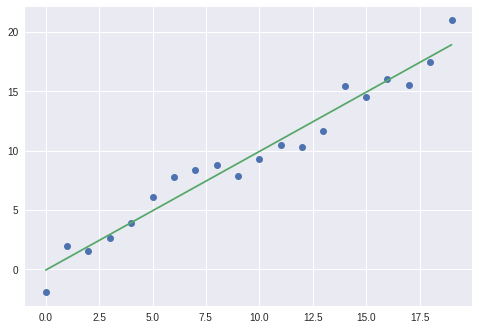

In [68]:
x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x,y, 'o', np.arange(20), a*np.arange(20)+b, '-')

In [0]:
import tensorflow as tf

# Training and testing data
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.mnist.load_data()


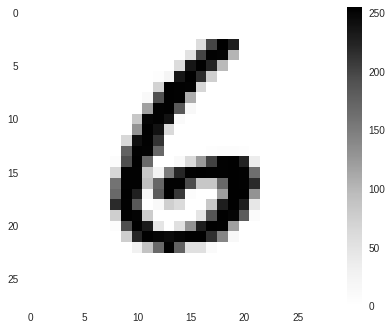

In [70]:
# Checkout the training data.
plt.figure()
plt.imshow(train_images[6000])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

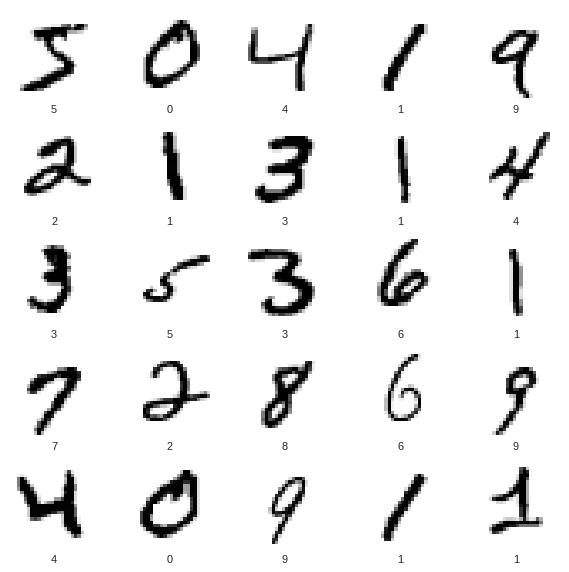

In [72]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [0]:
#Prepare the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
#Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
#Fit the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2594 - acc: 0.9263
Epoch 2/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1141 - acc: 0.9660
Epoch 3/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0772 - acc: 0.9766
Epoch 4/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0585 - acc: 0.9823
Epoch 5/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0455 - acc: 0.9861


#Check the accuracy

In [77]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.0857 - acc: 0.9738
Test accuracy: 0.9738


In [0]:
predictions = model.predict(test_images)

In [79]:
predictions[0]

array([9.3308454e-09, 1.2176606e-09, 2.9041518e-08, 4.2184198e-05,
       4.6557775e-12, 1.1630980e-06, 9.5119889e-14, 9.9995470e-01,
       5.7938887e-08, 1.8536617e-06], dtype=float32)

In [85]:
np.argmax(predictions[500])

3

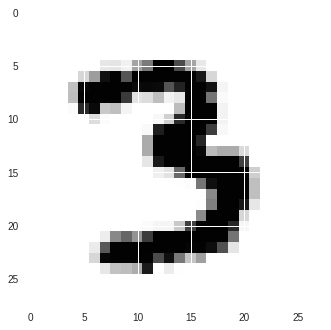

In [86]:
#Check the number - visualize
plt.figure()
plt.imshow(test_images[500])

In [0]:

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

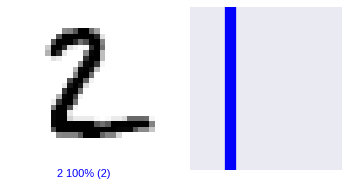

In [98]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)